In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Paths to data

In [3]:
# Definition of paths
data_dir = os.path.join(os.getcwd(), '../Dataset')

raw_data_dir = os.path.join(data_dir, 'raw')
ids_mapping = os.path.join(raw_data_dir, 'IDS_mapping.csv')
diabetes_data = os.path.join(raw_data_dir, 'diabetic_data.csv')

mapping_data_dir = os.path.join(data_dir, 'Mapping')
os.makedirs(mapping_data_dir, exist_ok=True)

preprocessed_out_dir = os.path.join(data_dir, 'Preprocessed')
os.makedirs(preprocessed_out_dir, exist_ok=True)

admission_type_mapping_data = os.path.join(mapping_data_dir, 'admission_type_mapping.csv')
discharge_disposition_data = os.path.join(mapping_data_dir, 'discharge_disposition_mapping.csv')
admission_source_mapping_data = os.path.join(mapping_data_dir, 'admission_source_mapping.csv')

preprocessed_saved_filepath = os.path.join(preprocessed_out_dir, 'preprocessed.pkl')

## Load the DataFrame

In [4]:
# Lets load the main dataset
df = pd.read_csv(diabetes_data)

In the dataset, there are "?" sign that represented the NaN values. We shall replace that with np.nan.

In [5]:
# find out how many columns have '?' and the count of such values in different columns
na_summary = (df == '?').sum()
na_summary[na_summary != 0]

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64

In [6]:
# Replace all ?s with NaN
df.replace('?', pd.NA, inplace=True)

## Cleaning up NaNs

### Columns with NaNs

In [7]:
# lets look at columns with NaNs
columns_with_nans = df.isna().sum()
columns_with_nans[columns_with_nans != 0]

race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
max_glu_serum        96420
A1Cresult            84748
dtype: int64

### Helper functions

In [8]:
def analyzeColumn(df, columnName):
    print(f'Column name: {columnName}')
    print(f'Data type: {df[columnName].dtype}')

    print()
    naSum = df[columnName].isna().sum()
    print(f'Count of NAs: {naSum}, %NAs = {naSum/len(df[columnName])*100}')

    print()
    uniqueValues = df[columnName].unique()
    print(f'Number of unique values: {len(uniqueValues)}')

    print()
    print('Unique values: ')
    print(f'{uniqueValues}')

    print()
    print('ValueCounts: ')
    print(df[columnName].value_counts())

    print()
    print('ValueCounts: Normalized')
    print(df[columnName].value_counts(normalize = True))

### Column: 'race'

In [9]:
analyzeColumn(df, 'race')

Column name: race
Data type: object

Count of NAs: 2273, %NAs = 2.2335554114340743

Number of unique values: 6

Unique values: 
['Caucasian' 'AfricanAmerican' <NA> 'Other' 'Asian' 'Hispanic']

ValueCounts: 
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

ValueCounts: Normalized
race
Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: proportion, dtype: float64


In [10]:
# Lets convert NAs to "Unknown" and also convert the column to categorical
df['race'] = df['race'].fillna('Unknown')
df['race'] = df['race'].astype('category')

### Column: 'Weight'

In [11]:
analyzeColumn(df, 'weight')

Column name: weight
Data type: object

Count of NAs: 98569, %NAs = 96.85847925633315

Number of unique values: 10

Unique values: 
[<NA> '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

ValueCounts: 
weight
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: count, dtype: int64

ValueCounts: Normalized
weight
[75-100)     0.417892
[50-75)      0.280576
[100-125)    0.195496
[125-150)    0.045355
[25-50)      0.030341
[0-25)       0.015014
[150-175)    0.010948
[175-200)    0.003441
>200         0.000938
Name: proportion, dtype: float64


~96% of rows have missing values, lets drop this column

In [12]:
df = df.drop(columns = 'weight')

### Column : 'payer_code'

In [13]:
analyzeColumn(df, 'payer_code')

Column name: payer_code
Data type: object

Count of NAs: 40256, %NAs = 39.5574160328597

Number of unique values: 18

Unique values: 
[<NA> 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC'
 'OT' 'OG' 'MP' 'FR']

ValueCounts: 
payer_code
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

ValueCounts: Normalized
payer_code
MC    0.527378
HM    0.102000
SP    0.081401
BC    0.075679
MD    0.057422
CP    0.041180
UN    0.039798
CM    0.031491
OG    0.016794
PO    0.009624
DM    0.008925
CH    0.002374
WC    0.002195
OT    0.001544
MP    0.001284
SI    0.000894
FR    0.000016
Name: proportion, dtype: float64


The column has a high percentage of NaN values. Furthermore the column is unlikely to contribute to the outcome.
We will drop the column.

In [14]:
df = df.drop(columns='payer_code')

### Column: 'medical_specialty'

In [15]:
analyzeColumn(df, 'medical_specialty')

Column name: medical_specialty
Data type: object

Count of NAs: 49949, %NAs = 49.08220820313268

Number of unique values: 73

Unique values: 
['Pediatrics-Endocrinology' <NA> 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehab

The column has high percentage of missing values. However, the column may have a correlation with the outcome. We keep the column for now, and impute the missing values as "Unknown", we also change the column to categorical type.

In [16]:
df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')
df['medical_specialty'] = df['medical_specialty'].astype('category')

### Column: 'diag_1', 'diag_2', 'diag_3'

In [17]:
analyzeColumn(df, 'diag_1')

Column name: diag_1
Data type: object

Count of NAs: 21, %NAs = 0.02063557573256294

Number of unique values: 717

Unique values: 
['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '198' '564' '812' '38' '590' '556'
 '578' '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558'
 '574' '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332'
 '562' '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625'
 '571' '738' '593' '250.42' '807' '456' '446' '575' '250.41' '820' '515'
 '780' '250.22' '995' '235' '250.82' '721' '787' '162' '724' '282' '514'
 'V55' '281' '250.33' '530' '466' '435' '250.12' 'V53' '789' '566' '822'
 '191' '557' '733' '455' '711' '482' '202' '280' '553' '225' '154' '

In [18]:
analyzeColumn(df, 'diag_2')

Column name: diag_2
Data type: object

Count of NAs: 358, %NAs = 0.3517874339170253

Number of unique values: 749

Unique values: 
[<NA> '250.01' '250' '250.43' '157' '411' '492' '427' '198' '403' '288'
 '998' '507' '174' '425' '456' '401' '715' '496' '428' '585' '250.02'
 '410' '999' '996' '135' '244' '41' '571' '276' '997' '599' '424' '491'
 '553' '707' '286' '440' '493' '242' '70' 'V45' '250.03' '357' '511' '196'
 '396' '197' '414' '250.52' '577' '535' '413' '285' '53' '780' '518' '150'
 '566' '250.6' '867' '486' 'V15' '8' '788' '340' '574' '581' '228' '530'
 '250.82' '786' '294' '567' '785' '512' '305' '729' '250.51' '280' '648'
 '560' '618' '444' '38' 'V10' '578' '277' '781' '250.42' '278' '426' '584'
 '462' '402' '153' '272' '733' '34' '881' '203' '250.41' '250.13' '293'
 '245' '250.12' '558' '787' '342' '573' '626' '303' '250.53' '458' '710'
 '415' 'V42' '284' '569' '759' '682' '112' '292' '435' '290' '250.93'
 '642' '536' '398' '319' '711' 'E878' '446' '255' 'V44' '250.7' '784'

In [19]:
analyzeColumn(df, 'diag_3')

Column name: diag_3
Data type: object

Count of NAs: 1423, %NAs = 1.398305917497003

Number of unique values: 790

Unique values: 
[<NA> '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427'
 '627' '414' '416' '714' '428' '582' 'V43' '250.01' '263' '250.42' '276'
 '482' '401' '250.41' '585' '781' '278' '998' '568' '682' '618' '250.02'
 '305' '707' '496' '599' '715' '424' '518' '553' '794' '411' 'V42' '531'
 '511' '490' '562' '250.8' '250.7' '250.52' '784' '491' '581' '420' '8'
 '724' '730' '789' '131' '250.82' '999' '41' '493' '250.03' '753' '786'
 '529' 'E888' '425' '595' '303' '560' '711' '492' '332' '296' '438' '362'
 '250.4' '654' '244' 'V70' '737' '625' '681' '250.51' '404' 'V10' '810'
 '280' '440' '785' '588' '569' '272' '997' '250.43' '918' '584' '54' '788'
 '426' '722' '250.92' '196' '461' '535' '787' '891' '284' '458' '648'
 '780' '182' '285' '593' '413' '664' '564' '201' '356' 'V15' '292' '782'
 '473' '455' 'E932' '357' '348' '294' '250.23' '459' 'E878' '437' '73

The columns are important and indicate the diagnosis of the patient. We keep the rows, by imputing missing values to 'Unknown', at the same time, we convert the column to categorical

In [20]:
diagColumns = ['diag_1', 'diag_2', 'diag_3']
for column in diagColumns:
    df[column] = df[column].fillna('Unknown')
    df[column] = df[column].astype('category')

### Column: 'max_glu_serum'

In [21]:
analyzeColumn(df, 'max_glu_serum')

Column name: max_glu_serum
Data type: object

Count of NAs: 96420, %NAs = 94.74677200636755

Number of unique values: 4

Unique values: 
[nan '>300' 'Norm' '>200']

ValueCounts: 
max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64

ValueCounts: Normalized
max_glu_serum
Norm    0.485784
>200    0.277778
>300    0.236438
Name: proportion, dtype: float64


We impute the missing values with 'Unknown'

In [22]:
df['max_glu_serum'] = df['max_glu_serum'].fillna('Unknown')

### Column: 'A1Cresult'

In [23]:
analyzeColumn(df, 'A1Cresult')

Column name: A1Cresult
Data type: object

Count of NAs: 84748, %NAs = 83.27732248491637

Number of unique values: 4

Unique values: 
[nan '>7' '>8' 'Norm']

ValueCounts: 
A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

ValueCounts: Normalized
A1Cresult
>8      0.482783
Norm    0.293219
>7      0.223998
Name: proportion, dtype: float64


We fill NaNs with 'Unknown'

In [24]:
df['A1Cresult'] = df['A1Cresult'].fillna('Unknown')

## Handling Medicine columns

In [25]:
medicineColumns = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

Many of the medicine columns are sparse, lets first take a look at the sparsity of the values.

In [26]:
def analyzeSparsity(df):
    sparse_cols = (df == 'No').sum() / df.shape[0]
    sparse_cols.sort_values(ascending=False, inplace=True)

    sparse_cols_filtered = sparse_cols[sparse_cols >= 0.99].index
    nonsparse_cols_filtered = sparse_cols[sparse_cols <= 0.99].index

    max_len = max(len(col) for col in sparse_cols.index)

    print("Sparse columns (>=99% with value 'No'): \n")
    for col in sparse_cols_filtered:
        print(f"{col:<{max_len}} - sparcity: {sparse_cols[col]:.4f}")
        
    print("\nNon-sparse columns (<99% with value 'No'): \n")
    for col in nonsparse_cols_filtered:
        print(f"{col:<{max_len}} - sparcity: {sparse_cols[col]:.4f}")

    return sparse_cols_filtered, nonsparse_cols_filtered

In [27]:
sparse_medicine_columns, nonsparse_medicine_columns = analyzeSparsity(df[medicineColumns])

Sparse columns (>=99% with value 'No'): 

citoglipton              - sparcity: 1.0000
examide                  - sparcity: 1.0000
acetohexamide            - sparcity: 1.0000
metformin-pioglitazone   - sparcity: 1.0000
glimepiride-pioglitazone - sparcity: 1.0000
metformin-rosiglitazone  - sparcity: 1.0000
troglitazone             - sparcity: 1.0000
glipizide-metformin      - sparcity: 0.9999
tolbutamide              - sparcity: 0.9998
miglitol                 - sparcity: 0.9996
tolazamide               - sparcity: 0.9996
chlorpropamide           - sparcity: 0.9992
acarbose                 - sparcity: 0.9970
nateglinide              - sparcity: 0.9931
glyburide-metformin      - sparcity: 0.9931

Non-sparse columns (<99% with value 'No'): 

repaglinide              - sparcity: 0.9849
glimepiride              - sparcity: 0.9490
rosiglitazone            - sparcity: 0.9375
pioglitazone             - sparcity: 0.9280
glyburide                - sparcity: 0.8953
glipizide                - sparc

Following medicines have sparse values > 99% values are with No medicine administered. We will drop these columns

In [28]:
df = df.drop(columns = sparse_medicine_columns)

## Object Columns

In [29]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Column: 'gender

In [30]:
analyzeColumn(df, 'gender')

Column name: gender
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 3

Unique values: 
['Female' 'Male' 'Unknown/Invalid']

ValueCounts: 
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

ValueCounts: Normalized
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


There are just 3 rows with 'gender' as 'Unknown/Invalid'. Lets drop these rows

In [31]:
df = df.drop(df[df['gender'] == 'Unknown/Invalid'].index)

### Column: 'age'

In [32]:
analyzeColumn(df, 'age')

Column name: age
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 10

Unique values: 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

ValueCounts: 
age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

ValueCounts: Normalized
age
[70-80)     0.256144
[60-70)     0.220925
[50-60)     0.169570
[80-90)     0.168991
[40-50)     0.095172
[30-40)     0.037096
[90-100)    0.027446
[20-30)     0.016283
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64


There are very few values < 30, lets bin them to a single bin.

In [33]:
bin_edges = [0, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age-binned'] = pd.cut(df['age'].str.extract('(\d+)')[0].astype(int), bins=bin_edges, labels=bin_labels, right=False)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_9407/1969488850.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['age-binned'] = pd.cut(df['age'].str.extract('(\d+)')[0].astype(int), bins=bin_edges, labels=bin_labels, right=False)


### Column: 'max_glu_serum'

In [34]:
analyzeColumn(df, 'max_glu_serum')

Column name: max_glu_serum
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 4

Unique values: 
['Unknown' '>300' 'Norm' '>200']

ValueCounts: 
max_glu_serum
Unknown    96417
Norm        2597
>200        1485
>300        1264
Name: count, dtype: int64

ValueCounts: Normalized
max_glu_serum
Unknown    0.947466
Norm       0.025520
>200       0.014593
>300       0.012421
Name: proportion, dtype: float64


Indicates the range of the result or if the test was not taken.  
Values: “>200,” “>300,”, “normal,” and “Unknown” if not measured.  

We split the column to two columns:  

**max_glu_serum** = Ordinal encoding  
0 : Unknown/Not measured.  
1 : Norm.  
2 : >200.  
3 : >300.  

**max_glu_serum_measured** = Categorical  
Yes : If the values were measured  
No  : Otherwise 

In [35]:
# Create the 'measured' column (Yes/No)
df['max_glu_serum_measured'] = df['max_glu_serum'].apply(lambda x: 'No' if x == 'Unknown' else 'Yes')
df['max_glu_serum_measured'] = df['max_glu_serum_measured'].astype('category')
ordinal_mapping = {'Unknown' : 0, 'Norm': 1, '>200': 2, '>300': 3 }
df['max_glu_serum'] = df['max_glu_serum'].map(ordinal_mapping)

### Column: 'A1Cresult'

In [36]:
analyzeColumn(df, 'A1Cresult')

Column name: A1Cresult
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 4

Unique values: 
['Unknown' '>7' '>8' 'Norm']

ValueCounts: 
A1Cresult
Unknown    84745
>8          8216
Norm        4990
>7          3812
Name: count, dtype: int64

ValueCounts: Normalized
A1Cresult
Unknown    0.832768
>8         0.080737
Norm       0.049036
>7         0.037460
Name: proportion, dtype: float64


Indicates the range of the result or if the test was not taken.  
Values: “>8,” “>7,”, “Norm,” and “Unknown” if not measured.  

We split the column to two columns:  

**A1Cresult** = Ordinal encoding  
0 : Unknown/Not measured.  
1 : Norm.  
2 : >200.  
3 : >300.  

**A1Cresult_measured** = Categorical  
Yes : If the values were measured  
No  : Otherwise 

In [37]:
df['A1Cresult_measured'] = df['A1Cresult'].apply(lambda x: 'No' if x == 'Unknown' else 'Yes')
df['A1Cresult_measured'] = df['A1Cresult_measured'].astype('category')
ordinal_mapping = {'Unknown' : 0, 'Norm': 1, '>7': 2, '>8': 3 }
df['A1Cresult'] = df['A1Cresult'].map(ordinal_mapping)

### Column: Medicine columns

In [38]:
for medicine_column in nonsparse_medicine_columns.to_list():
    analyzeColumn(df, medicine_column)
    print('\n ------------------------------------------- \n')

Column name: repaglinide
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 4

Unique values: 
['No' 'Up' 'Steady' 'Down']

ValueCounts: 
repaglinide
No        100224
Steady      1384
Up           110
Down          45
Name: count, dtype: int64

ValueCounts: Normalized
repaglinide
No        0.984877
Steady    0.013600
Up        0.001081
Down      0.000442
Name: proportion, dtype: float64

 ------------------------------------------- 

Column name: glimepiride
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 4

Unique values: 
['No' 'Steady' 'Down' 'Up']

ValueCounts: 


glimepiride
No        96572
Steady     4670
Up          327
Down        194
Name: count, dtype: int64

ValueCounts: Normalized
glimepiride
No        0.948989
Steady    0.045891
Up        0.003213
Down      0.001906
Name: proportion, dtype: float64

 ------------------------------------------- 

Column name: rosiglitazone
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 4

Unique values: 
['No' 'Steady' 'Up' 'Down']

ValueCounts: 
rosiglitazone
No        95399
Steady     6099
Up          178
Down         87
Name: count, dtype: int64

ValueCounts: Normalized
rosiglitazone
No        0.937463
Steady    0.059933
Up        0.001749
Down      0.000855
Name: proportion, dtype: float64

 ------------------------------------------- 

Column name: pioglitazone
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 4

Unique values: 
['No' 'Steady' 'Up' 'Down']

ValueCounts: 
pioglitazone
No        94436
Steady     6975
Up          234
Down        118
Name

These columns indicate dosage of medicines administered to the patient. Question: Are these the values that are administered during the visit? If so it will not impact the outcomes. We come back to this question later on. For now we adopt following approach:  

We split the column to two columns:  

**medicinename** = Ordinal encoding  
-1 : Down, dosage was reduced.  
 0 : No, medicine was not administered.  
 1 : Steady, dosage was not changed.  
 2 : Up, dosage was increased.  

**medicinename_measured** = Categorical  
Yes : If the values were measured  
No  : Otherwise 

In [39]:
for col in nonsparse_medicine_columns.to_list():
  df[f'{col}_measured'] = df[col].apply(lambda x: 'No' if x == 'No' else 'Yes')
  df[f'{col}_measured'] = df[f'{col}_measured'].astype('category')
  
  ordinal_mapping = {'Down' : -1, 'No': 0, 'Steady': 1, 'Up': 2 }
  df[col] = df[col].map(ordinal_mapping)

### Column: 'change'

In [40]:
analyzeColumn(df, 'change')

Column name: change
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 2

Unique values: 
['No' 'Ch']

ValueCounts: 
change
No    54754
Ch    47009
Name: count, dtype: int64

ValueCounts: Normalized
change
No    0.538054
Ch    0.461946
Name: proportion, dtype: float64


The column has just two values. We convert it to categorical type.

In [41]:
df['change'] = df['change'].astype('category')

### Column: 'diabetesMed'

In [42]:
analyzeColumn(df, 'diabetesMed')

Column name: diabetesMed
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 2

Unique values: 
['No' 'Yes']

ValueCounts: 
diabetesMed
Yes    78361
No     23402
Name: count, dtype: int64

ValueCounts: Normalized
diabetesMed
Yes    0.770034
No     0.229966
Name: proportion, dtype: float64


It is a simple categorical column.

In [43]:
df['diabetesMed'] = df['diabetesMed'].astype('category')

### Column: 'readmitted', the target feature


If the patient was readmitted in less than 30 days, then the value is "<30"
If the patient was readmitted in more than 30 days, then the value is ">30"
If the patient was never readmitted, then the value is NO
Since we want to determine whether the patient was readmitted irrespective of number of days, hence

If the patient was never readmitted, then the value is 0.
If the patient was readmitted, then value is 1.

In [44]:
analyzeColumn(df, 'readmitted')

Column name: readmitted
Data type: object

Count of NAs: 0, %NAs = 0.0

Number of unique values: 3

Unique values: 
['NO' '>30' '<30']

ValueCounts: 
readmitted
NO     54861
>30    35545
<30    11357
Name: count, dtype: int64

ValueCounts: Normalized
readmitted
NO     0.539106
>30    0.349292
<30    0.111602
Name: proportion, dtype: float64


For first analysis lets consider readmission <30 days and >30 days as just readmission : YES. Also change the column to type categorical.

In [45]:
df['readmitted'] = df['readmitted'].str.replace('>30', 'YES')
df['readmitted'] = df['readmitted'].str.replace('<30', 'YES')
df['readmitted'] = df['readmitted'].astype('category')

## The numerical columns

In [46]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin'],
      dtype='object')

The columns 'encounter_id' and 'patient_nbr' are unique ids. We keep them as is.

### Some helper functions

In [47]:
def analyzeNumericalColumn(df, columnName):
    print(f'Column name: {columnName}')
    print(f'Data type: {df[columnName].dtype}')

    print()
    naSum = df[columnName].isna().sum()
    print(f'Count of NAs: {naSum}, %NAs = {naSum/len(df[columnName])*100}')

    print()
    uniqueValues = df[columnName].unique()
    print(f'Number of unique values: {len(uniqueValues)}')

    print()
    print('Unique values: ')
    print(f'{uniqueValues}')

    print()
    print('Value counts: ')
    print(df[columnName].value_counts())

    print()
    print('Statistics')
    print(df[columnName].describe())


### Column: 'admission_type_id'

In [48]:
analyzeNumericalColumn(df, 'admission_type_id')

Column name: admission_type_id
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 8

Unique values: 
[6 1 2 3 4 5 8 7]

Value counts: 
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

Statistics
count    101763.000000
mean          2.024017
std           1.445414
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: admission_type_id, dtype: float64


admission_type_id is in fact categorical. Lets change the type to categorical.

In [49]:
df['admission_type_id'] = df['admission_type_id'].astype('category')

### Column: 'discharge_disposition_id'

In [50]:
analyzeNumericalColumn(df, 'discharge_disposition_id')

Column name: discharge_disposition_id
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 26

Unique values: 
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]

Value counts: 
discharge_disposition_id
1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

Statistics
count    101763.000000
mean          3.715515
std           5.279919
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          28.000000
Name: discharge_disposition_id, dtype: float64


Even the column discharge_disposition_id is in fact categorical. Lets change the column to categorical type.

In [51]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')

### Column: 'admission_source_id'

In [52]:
analyzeNumericalColumn(df, 'admission_source_id')

Column name: admission_source_id
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 17

Unique values: 
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]

Value counts: 
admission_source_id
7     57492
1     29564
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

Statistics
count    101763.000000
mean          5.754459
std           4.064110
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64


Again the column admission_source_id is categorical. Lets change the type.

In [53]:
df['admission_source_id'] = df['admission_source_id'].astype('category')

### Column: 'time_in_hospital'

In [54]:
analyzeNumericalColumn(df, 'time_in_hospital')

Column name: time_in_hospital
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 14

Unique values: 
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]

Value counts: 
time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

Statistics
count    101763.000000
mean          4.396018
std           2.985092
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


We keep the column as numerical.

### Column: 'num_lab_procedures'

In [55]:
analyzeNumericalColumn(df, 'num_lab_procedures')

Column name: num_lab_procedures
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 118

Unique values: 
[ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]

Value counts: 
num_lab_procedures
1      3208
43     2804
44     2496
45     2376
38     2212
       ... 
120       1
132       1
121       1
126       1
118       1
Name: count, Length: 118, dtype: int64

Statistics
count    101763.000000
mean         43.095909
std          19.674220
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.

We keep this column as is.

### Column: 'num_procedures'

In [56]:
analyzeNumericalColumn(df, 'num_procedures')

Column name: num_procedures
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 7

Unique values: 
[0 5 1 6 2 3 4]

Value counts: 
num_procedures
0    46652
1    20741
2    12716
3     9443
6     4954
4     4180
5     3077
Name: count, dtype: int64

Statistics
count    101763.000000
mean          1.339691
std           1.705792
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64


We keep this column as is.

### Column: 'num_medications'

In [57]:
analyzeNumericalColumn(df, 'num_medications')

Column name: num_medications
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 75

Unique values: 
[ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 53 48 57 59 56 60 63 58 70 67 64 69 65 68 66 81 79
 75 72 74]

Value counts: 
num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64

Statistics
count    101763.000000
mean         16.021835
std           8.127589
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64


We keep this column as is.

### Column: 'number_outpatient'

In [58]:
analyzeNumericalColumn(df, 'number_outpatient')

Column name: number_outpatient
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 39

Unique values: 
[ 0  2  1  5  7  9  3  8  4 12 11  6 20 15 10 13 14 16 21 35 17 29 36 18
 19 27 22 24 42 39 34 26 33 25 23 28 37 38 40]

Value counts: 
number_outpatient
0     85024
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
20        7
21        7
18        5
22        5
19        3
24        3
27        3
35        2
29        2
36        2
25        2
33        2
26        2
23        2
34        1
42        1
39        1
28        1
37        1
38        1
40        1
Name: count, dtype: int64

Statistics
count    101763.000000
mean          0.369368
std           1.267282
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: f

We keep this column as is.

### Column: 'number_emergency'

In [59]:
analyzeNumericalColumn(df, 'number_emergency')

Column name: number_emergency
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 33

Unique values: 
[ 0  1  2  4  3  9  5  7  6  8 22 25 10 13 42 16 11 28 15 14 18 12 21 20
 19 46 76 37 64 63 54 24 29]

Value counts: 
number_emergency
0     90380
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
20        4
19        4
15        3
14        3
21        2
25        2
42        1
28        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: count, dtype: int64

Statistics
count    101763.000000
mean          0.197842
std           0.930485
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: number_emergency, dtype: float64


We keep this column as is.

### Column: 'number_inpatient'

In [60]:
analyzeNumericalColumn(df, 'number_inpatient')

Column name: number_inpatient
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 21

Unique values: 
[ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 19]

Value counts: 
number_inpatient
0     67627
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: count, dtype: int64

Statistics
count    101763.000000
mean          0.635585
std           1.262877
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: number_inpatient, dtype: float64


We keep this column as is.

### Column: 'number_diagnoses'

In [61]:
analyzeNumericalColumn(df, 'number_diagnoses')

Column name: number_diagnoses
Data type: int64

Count of NAs: 0, %NAs = 0.0

Number of unique values: 16

Unique values: 
[ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]

Value counts: 
number_diagnoses
9     49473
5     11392
8     10616
7     10393
6     10161
4      5536
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: count, dtype: int64

Statistics
count    101763.000000
mean          7.422649
std           1.933578
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: number_diagnoses, dtype: float64


We keep this column as is.

With this, we are done with cleaning up all columns in the dataframe.

## Duplicate rows handling

In [62]:
duplicatedPatients = df['patient_nbr'].duplicated().sum()
print(f'Number of duplicated patients: {duplicatedPatients}, percentage = {duplicatedPatients/len(df)*100}')

Number of duplicated patients: 30248, percentage = 29.723966471114256


Lets look at how many encounters, a patient had across dataset.

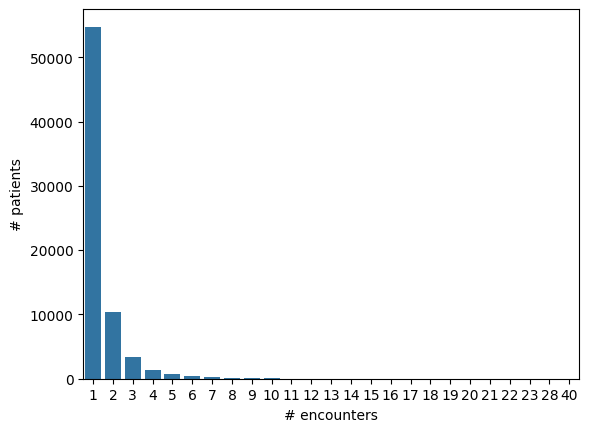

In [63]:
df_patvisits = df.groupby('patient_nbr')['encounter_id'].count().reset_index(name = '#encounters') \
.groupby('#encounters')['patient_nbr'].count().reset_index(name = '#patients') \
.sort_values(by = '#patients', ascending = False).set_index('#encounters')
sns.barplot(x = df_patvisits.index, y = df_patvisits['#patients'])
plt.xlabel('# encounters')
plt.ylabel('# patients')
plt.show()

For now, we keep just the first encounter for a given patient.

In [64]:
df = df.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

## Save the file locally.

In [65]:
df.to_pickle(preprocessed_saved_filepath)